<a href="https://colab.research.google.com/github/mariyakj/ASD/blob/main/ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install keras



In [ ]:
#import libraries
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py


# Pretty display for notebooks
%matplotlib inline



In [ ]:
#mount google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import the dataset
file = '/content/gdrive/MyDrive/train.csv'

# read the csv

asd_data = pd.read_table(file, sep = ',', index_col = None)

In [ ]:
#print some random data
print(asd_data.loc[0])

ID                           1
A1_Score                     1
A2_Score                     0
A3_Score                     1
A4_Score                     0
A5_Score                     1
A6_Score                     0
A7_Score                     1
A8_Score                     0
A9_Score                     1
A10_Score                    1
age                  38.172746
gender                       f
ethnicity                    ?
jaundice                    no
austim                      no
contry_of_res          Austria
used_app_before             no
result                6.351166
age_desc           18 and more
relation                  Self
Class/ASD                    0
Name: 0, dtype: object


In [ ]:
#print patient records
asd_data.loc[:10]
data=asd_data

In [ ]:
# print out a description of the dataframe
asd_data.describe()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
# Analysing the data
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 1])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 0])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))
print ("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))



Total number of records: 800
Individuals diagonised with ASD: 161
Individuals not diagonised with ASD: 639
Percentage of individuals diagonised with ASD: 20.12%


In [ ]:
asd_data = pd.read_csv('/content/gdrive/MyDrive/train.csv', na_values=['?'])
asd_data.head(n=5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,NaN,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
asd_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull())
|(asd_data['jaundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,NaN,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,India,no,2.255185,18 and more,Self,0
3,4,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,South Africa,no,-4.777286,18 and more,Self,0
10,11,1,1,1,1,1,1,1,0,1,...,f,NaN,no,no,Canada,no,13.839255,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,793,1,0,0,0,0,0,0,0,0,...,m,NaN,no,no,Bolivia,no,9.403804,18 and more,Self,0
793,794,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,United Kingdom,no,9.777375,18 and more,Self,0
794,795,0,1,0,0,1,0,0,1,0,...,m,NaN,no,no,India,no,9.592719,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,Canada,no,9.069342,18 and more,Self,0


In [ ]:
#clean dataset
asd_data.dropna(inplace=True)
asd_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,392.558511,0.652482,0.613475,0.540780,0.517730,0.485816,0.391844,0.485816,0.572695,0.597518,0.691489,28.746741,9.273158,0.271277
std,228.257128,0.476605,0.487385,0.498777,0.500129,0.500242,0.488595,0.500242,0.495126,0.490833,0.462289,16.454732,4.647231,0.445013
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.200405,-6.137748,0.000000
25%,199.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.216827,6.378118,0.000000
50%,393.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.245655,10.691040,0.000000
75%,582.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.187308,12.947958,1.000000
max,798.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.978179,15.853126,1.000000


In [ ]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object
Total number of records: 800
Individuals diagonised with ASD: 0
Individuals not diagonised with ASD: 0


In [ ]:
#Step 2: A quick visualization with Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

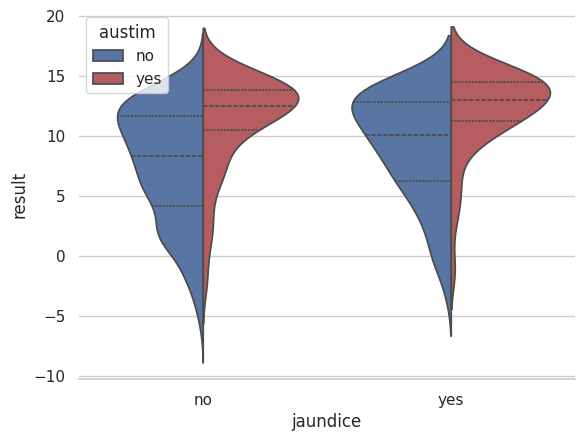

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jaundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

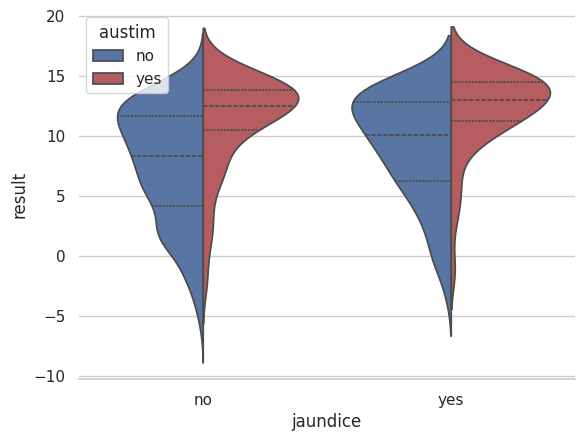

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jaundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

In [ ]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age',
                      'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.408726,1,0,1,0,1,0,1,0,1,1
1,0.519141,0,0,0,0,0,0,0,0,0,0
2,0.053743,1,1,1,1,1,1,1,1,1,1
3,0.240288,0,0,0,0,0,0,0,0,0,0
4,0.466748,0,0,0,0,0,0,0,0,0,0


In [ ]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print( "{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.408726,1,0,1,0,1,0,1,0,1,1
1,0.519141,0,0,0,0,0,0,0,0,0,0
2,0.053743,1,1,1,1,1,1,1,1,1,1
3,0.240288,0,0,0,0,0,0,0,0,0,0
4,0.466748,0,0,0,0,0,0,0,0,0,0


11 total features after one-hot encoding.
['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


Text(0, 0.5, 'Frequency')

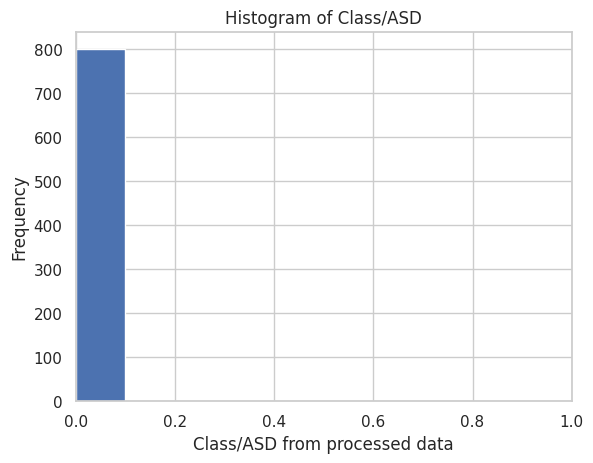

In [ ]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [ ]:
#Shuffle and Split Data
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print( "Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 640 samples.
Testing set has 160 samples.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# ***********************Decision Tree Classification***********************
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
y_pred_decTree = clf.predict(X_test)
print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_decTree))

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Select the best pruned model based on cross-validation
scores = [clf.score(X_test, y_test) for clf in clfs]
best_clf = clfs[scores.index(max(scores))]

# Predict on the testing data using the pruned model and evaluate accuracy
y_pred_pruned = best_clf.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Accuracy after pruning: {:.2f}".format(accuracy_pruned))



Accuracy of Decision Trees ::  1.0
Accuracy after pruning: 1.00


In [ ]:
# Using Random forest classifier


model = RandomForestClassifier(  max_depth=10, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test,
                             model.predict(X_test))*100)




Training Accuracy :  100.0
Validation Accuracy :  100.0


In [ ]:
#K Nearest Neighbours Classifier
nc = KNeighborsClassifier()
nc.fit(X_train,y_train)
y_pred_nc = nc.predict(X_test)
print("Accuracy of Neighbours Classifier :: ", metrics.accuracy_score(y_test, y_pred_nc))

Accuracy of Neighbours Classifier ::  1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Using Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes classifier
print("Naive Bayes Classifier :: ", metrics.accuracy_score(y_test, y_pred_nb))


Naive Bayes Classifier ::  1.0


In [ ]:
print(y_train.head())
print(y_train.value_counts())


797    0
411    0
0      0
318    0
555    0
Name: Class/ASD, dtype: int64
0    640
Name: Class/ASD, dtype: int64


In [ ]:
#Models and their accuracy
print("*****************Models and their accuracy*****************")

print("Decision Tree :: ", metrics.accuracy_score(y_test,y_pred_decTree))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test,y_pred_nc))
print("Naive bayes classifier::",metrics.accuracy_score(y_test,y_pred_nb))


*****************Models and their accuracy*****************
Decision Tree ::  1.0
Random Forest Classifier ::  1.0
K Neighbours Classifier ::  1.0
Naive bayes classifier:: 1.0
